<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

## Load and Prepare Data

In [2]:
# Load datasets
country_vaccinations = pd.read_csv('country_vaccinations.csv')
country_vaccinations_by_manufacturer = pd.read_csv('country_vaccinations_by_manufacturer.csv')

In [3]:
print(country_vaccinations.shape)
print(country_vaccinations_by_manufacturer.shape)

(31240, 15)
(9157, 4)


In [4]:
country_vaccinations.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [5]:
country_vaccinations_by_manufacturer.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30974
4,Austria,2021-01-15,Johnson&Johnson,0


## EDA

In [6]:
# General info
print(country_vaccinations.info())
print(country_vaccinations.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [7]:
# Missing values
print(country_vaccinations.isnull().sum())

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64


## Data Preprocessing

In [8]:
# Check for missing data
print("\nMissing data in country_vaccinations:\n", country_vaccinations.isnull().sum())
print("\nMissing data in country_vaccinations_by_manufacturer:\n", country_vaccinations_by_manufacturer.isnull().sum())

country_vaccinations.fillna(method='ffill', inplace=True)

country_vaccinations_by_manufacturer['total_vaccinations'].fillna(0, inplace=True)


Missing data in country_vaccinations:
 country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

Missing data in country_vaccinations_by_manufacturer:
 location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64


<ipython-input-8-57767d763212>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_vaccinations.fillna(method='ffill', inplace=True)


## Strorytelling - Visualization

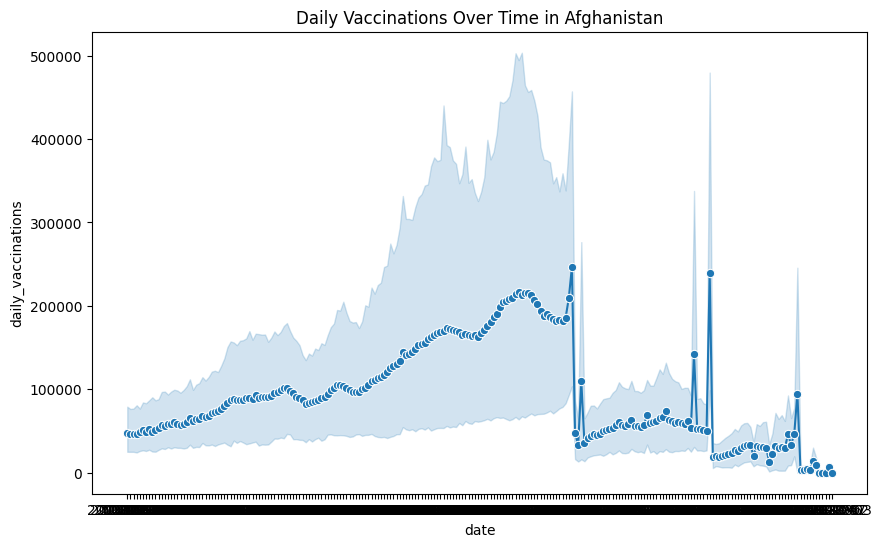

In [9]:
# Plot the daily vaccinations
plt.figure(figsize=(10, 6))
sns.lineplot(data=country_vaccinations, x='date', y='daily_vaccinations', marker='o')
plt.title('Daily Vaccinations Over Time in Afghanistan')
plt.show()

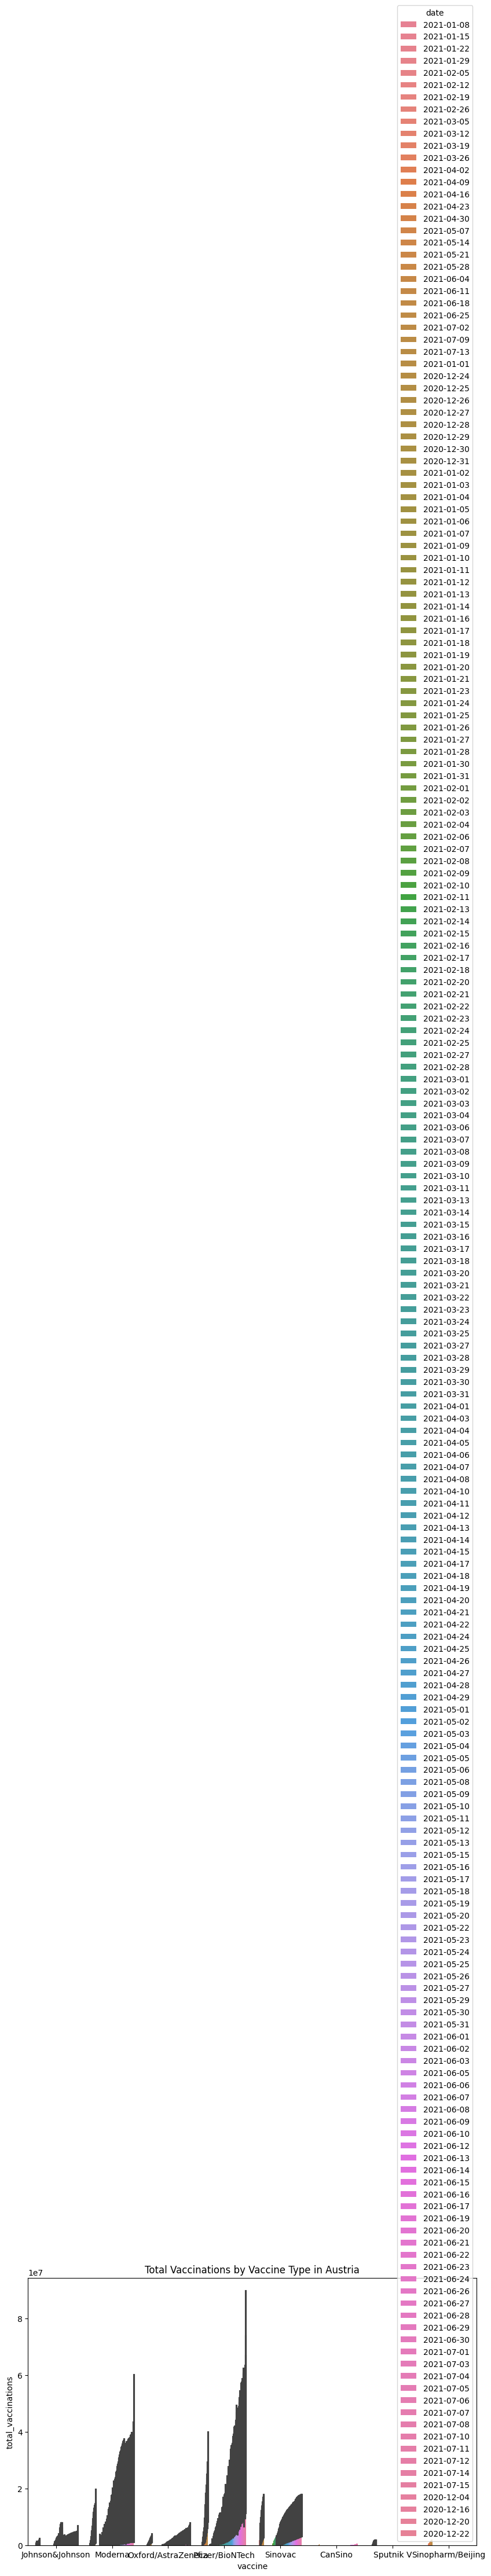

In [10]:
# Plot total vaccinations by vaccine type in Austria
plt.figure(figsize=(10, 6))
sns.barplot(data=country_vaccinations_by_manufacturer, x='vaccine', y='total_vaccinations', hue='date')
plt.title('Total Vaccinations by Vaccine Type in Austria')
plt.show()

## Prepare Data for Machine learning

In [11]:
# Assuming total vaccinations as the target variable
X = country_vaccinations[['daily_vaccinations_per_million']]
y = country_vaccinations['total_vaccinations'].fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train your model

In [12]:
from sklearn.impute import SimpleImputer

# Impute missing values in the feature data (X)
imputer_X = SimpleImputer(strategy='mean')
X_train_imputed = imputer_X.fit_transform(X_train)
X_test_imputed = imputer_X.transform(X_test)

# Impute missing values in the target data (y)
y_train_imputed = y_train.fillna(y_train.mean())
y_test_imputed = y_test.fillna(y_train.mean())

In [13]:
# Now train the model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

LinearRegression()

In [14]:
# Predictions
y_pred = model.predict(X_test_imputed)

In [15]:
# Model evaluation
mse = mean_squared_error(y_test_imputed, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2208801191535426.5


## Test the model and show the metrics

In [17]:
# Evaluate the model
mse_rf = mean_squared_error(y_test_imputed, y_pred)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_imputed, y_pred)
r2_rf = r2_score(y_test_imputed, y_pred)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest Root Mean Squared Error: {rmse_rf}')
print(f'Random Forest Mean Absolute Error: {mae_rf}')
print(f'Random Forest R-squared: {r2_rf}')

Random Forest Mean Squared Error: 2208801191535426.5
Random Forest Root Mean Squared Error: 46997884.96874542
Random Forest Mean Absolute Error: 10604830.029304609
Random Forest R-squared: 0.009918868959272076


## Save your final model

In [18]:
with open('vaccination_model.pkl', 'wb') as file:
    pickle.dump(model, file)

## Send us the Result (Maktabkhoone)